In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
from google.colab import files

In [29]:
uploaded = files.upload()

Saving football_CLEAN.csv to football_CLEAN.csv


In [30]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "football_CLEAN.csv" with length 34648 bytes


In [31]:
uploaded

{'football_CLEAN.csv': b"name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing\r\nAlexis Sanchez,Arsenal,28,LW,1,65,4329,12,17.10%,264,3,Chile,0,4,1,1,0\r\nMesut Ozil,Arsenal,28,AM,1,50,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0\r\nPetr Cech,Arsenal,35,GK,4,7,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0\r\nTheo Walcott,Arsenal,28,RW,1,20,2393,7.5,1.50%,122,1,England,0,4,1,1,0\r\nLaurent Koscielny,Arsenal,31,CB,3,22,912,6,0.70%,121,2,France,0,4,1,1,0\r\nHector Bellerin,Arsenal,22,RB,3,30,1675,6,13.70%,119,2,Spain,0,2,1,1,0\r\nOlivier Giroud,Arsenal,30,CF,1,22,2230,8.5,2.50%,116,2,France,0,4,1,1,0\r\nNacho Monreal,Arsenal,31,LB,3,13,555,5.5,4.70%,115,2,Spain,0,4,1,1,0\r\nShkodran Mustafi,Arsenal,25,CB,3,30,1877,5.5,4.00%,90,2,Germany,0,3,1,1,1\r\nAlex Iwobi,Arsenal,21,LW,1,10,1812,5.5,1.00%,89,4,Nigeria,0,1,1,1,0\r\nGranit Xhaka,Arsenal,24,DM,2,35,1815,5.5,2.00%,85,2,Switzerland,0,2,1,1,0\

In [32]:
import io

In [34]:
train= pd.read_csv(io.StringIO(uploaded['football_CLEAN.csv'].decode('utf-8')))
train.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0


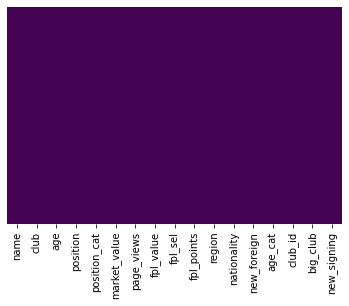

In [35]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
train.drop(['name'],axis=1,inplace=True)

In [37]:
train.head()

,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0


In [38]:
train.drop(['club'],axis=1,inplace=True)

In [39]:
train.head()

,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0


In [40]:
train.drop(['position'],axis=1,inplace=True)
train.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,28,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,28,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,35,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,28,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,31,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0


In [41]:
train.drop(['nationality'],axis=1,inplace=True)
train.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
0,28,1,65.0,4329,12.0,17.10%,264,3,0,4,1,1,0
1,28,1,50.0,4395,9.5,5.60%,167,2,0,4,1,1,0
2,35,4,7.0,1529,5.5,5.90%,134,2,0,6,1,1,0
3,28,1,20.0,2393,7.5,1.50%,122,1,0,4,1,1,0
4,31,3,22.0,912,6.0,0.70%,121,2,0,4,1,1,0


In [42]:
train['FPL_SEL'] = pd.to_numeric(train['fpl_sel'].str[:-1])
train.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,FPL_SEL
0,28,1,65.0,4329,12.0,17.10%,264,3,0,4,1,1,0,17.1
1,28,1,50.0,4395,9.5,5.60%,167,2,0,4,1,1,0,5.6
2,35,4,7.0,1529,5.5,5.90%,134,2,0,6,1,1,0,5.9
3,28,1,20.0,2393,7.5,1.50%,122,1,0,4,1,1,0,1.5
4,31,3,22.0,912,6.0,0.70%,121,2,0,4,1,1,0,0.7


In [43]:
train.drop(['fpl_sel'],axis=1,inplace=True)
train.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,FPL_SEL
0,28,1,65.0,4329,12.0,264,3,0,4,1,1,0,17.1
1,28,1,50.0,4395,9.5,167,2,0,4,1,1,0,5.6
2,35,4,7.0,1529,5.5,134,2,0,6,1,1,0,5.9
3,28,1,20.0,2393,7.5,122,1,0,4,1,1,0,1.5
4,31,3,22.0,912,6.0,121,2,0,4,1,1,0,0.7


In [44]:
df = pd.DataFrame(train)
print (df)
print (df.dtypes)

     age  position_cat  market_value  ...  big_club  new_signing  FPL_SEL
0     28             1          65.0  ...         1            0     17.1
1     28             1          50.0  ...         1            0      5.6
2     35             4           7.0  ...         1            0      5.9
3     28             1          20.0  ...         1            0      1.5
4     31             3          22.0  ...         1            0      0.7
..   ...           ...           ...  ...       ...          ...      ...
456   21             2           5.0  ...         0            1      0.4
457   23             3           7.0  ...         0            1      0.2
458   23             3           4.5  ...         0            0      0.3
459   21             1           1.0  ...         0            1      5.9
460   27             1          10.0  ...         0            0      0.1

[461 rows x 13 columns]
age               int64
position_cat      int64
market_value    float64
page_views     

In [45]:
X= train.drop('market_value',axis=1)
Y= train['market_value']

In [46]:
from sklearn.model_selection  import train_test_split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(345, 12)
(116, 12)
(345,)
(116,)


In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
from sklearn import metrics

In [50]:
pred = regressor.predict(X_test)

Text(0, 0.5, 'Predicted prices')

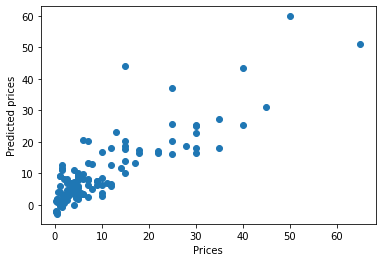

In [51]:
plt.scatter(Y_test,pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")

In [52]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))

In [53]:
print(RMSE)

6.276964899844313


In [55]:
!pip install tpot

     |████████████████████████████████| 92kB 3.2MB/s 
     |████████████████████████████████| 163kB 7.0MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=1c8cea892d9d68bc0add6d1a2cbef9036d15dd9b60070325fccc2e48e051161e
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [56]:
from tpot import TPOTRegressor

In [57]:
tpot = TPOTRegressor(generations=10, population_size=300, verbosity=2, random_state=42)

In [58]:
tpot.fit(X_train, Y_train)


Generation 1 - Current best internal CV score: -29.41983414495773

Generation 2 - Current best internal CV score: -29.41983414495773

Generation 3 - Current best internal CV score: -29.41983414495773

Generation 4 - Current best internal CV score: -28.235184773278547

Generation 5 - Current best internal CV score: -27.29985941059848

Generation 6 - Current best internal CV score: -26.627782404687217

Generation 7 - Current best internal CV score: -26.627782404687217

Generation 8 - Current best internal CV score: -26.627782404687217

Generation 9 - Current best internal CV score: -26.627782404687217

Generation 10 - Current best internal CV score: -26.627782404687217

Best pipeline: GradientBoostingRegressor(SGDRegressor(input_matrix, alpha=0.001, eta0=1.0, fit_intercept=True, l1_ratio=1.0, learning_rate=constant, loss=epsilon_insensitive, penalty=elasticnet, power_t=0.1), alpha=0.99, learning_rate=0.1, loss=lad, max_depth=6, max_features=1.0, min_samples_leaf=2, min_samples_split=19,

TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=10,
              log_file=None, max_eval_time_mins=5, max_time_mins=None,
              memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=300,
              random_state=42, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=2, warm_start=False)